In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import sys
sys.path.insert(1, '../packages/Elliot19_other_repo')
import basicTests.basictest as bt
import community as community_louvain

#filepath = '../datasets/1K/transactions.csv' #1K
#filepath = '../datasets/60K_low_sar_count/transactions.csv' #60K Low SAR\
filepath = '../datasets/60K_60_sar_count/transactions.csv' #60K Mid SAR
#filepath = '../datasets/60K_high_sar_count/transactions.csv' #60K High SAR
filepath = '../datasets/16K_5/transactions.csv' #60K Mid SAR

#filepath = '../datasets/60K_high_sar_count/transactions.csv'
df = pd.read_csv(filepath)
#df_sar_accounts = pd.read_csv(filepath[:-16] + "alert_accounts.csv")
df_sar_accounts = pd.read_csv(filepath[:-16] + "sar_accounts.csv")
df_accounts = pd.read_csv(filepath[:-16] + "accounts.csv")

accounts_df = df_accounts
np.sum(np.diff(np.diff(accounts_df["acct_id"])))

# Create a directed graph
graph_orig = nx.MultiDiGraph()   
graph2 = nx.DiGraph()
graph3 = nx.DiGraph()

# Add nodes to the graph using the accounts DataFrame
for index, row in accounts_df.iterrows():
    graph_orig.add_node(row["acct_id"])
    graph2.add_node(row["acct_id"])
    graph3.add_node(row["acct_id"])

# Add edges to the graph using the transactions DataFrame
for index, row in df.iterrows():
    graph_orig.add_edge(row["orig_acct"], row["bene_acct"], base_amt=row["base_amt"], is_sar=row["is_sar"], tx_type=row["tx_type"])

sar_accounts = list((df_sar_accounts['ACCOUNT_ID']))

accounts_np = np.empty((0,19))

count = 0
for node in graph_orig.nodes: #loop through nodes. Current node is u
    '''
    if count > 100:
        break
    count += 1
    '''

    node_isSar = 0
    if node in sar_accounts:
        node_isSar = 1

    amt_in_arr = []
    deg_in_arr = []
    #amt_transfer_percent_in_arr = [0] #add later. Need to figure out how to do this
    
    incoming_edges = graph_orig.in_edges(node, data=True)
    for source, target, edge_data in incoming_edges:
        deg_in_arr.append(source)
        amt_in_arr.append(edge_data["base_amt"])

    if not amt_in_arr:
        amt_in_arr = [0]

    node_amt_total_in = np.sum(amt_in_arr)
    node_amt_min_in = np.min(amt_in_arr)
    node_amt_max_in = np.max(amt_in_arr)
    node_amt_mean_in = np.mean(amt_in_arr)
    node_amt_median_in = np.median(amt_in_arr)
    node_amt_std_in = np.std(amt_in_arr)
    #node_account_max_percent_in = np.max(amt_transfer_percent_in_arr)#add later. Need to figure out how to do this
    #node_account_mean_percent_in = np.max(amt_transfer_percent_in_arr)#add later. Need to figure out how to do this
    node_deg_in = len(deg_in_arr) #counts multuple edges from one node if it exists
    node_deg_in_unique = len(set(deg_in_arr)) #unique nodes (removed multiple edges from one nodes, only consider it as 1 edge)
    

    amt_out_arr = []
    deg_out_arr = []
    outgoing_edges = graph_orig.out_edges(node, data=True)
    for source, target, edge_data in outgoing_edges:
        deg_out_arr.append(target)
        amt_out_arr.append(edge_data["base_amt"])

        

    if not amt_out_arr:
        amt_out_arr = [0]

    node_amt_total_out = np.sum(amt_out_arr)
    node_amt_min_out = np.min(amt_out_arr)
    node_amt_max_out = np.max(amt_out_arr)
    node_amt_mean_out = np.mean(amt_out_arr)
    node_amt_median_out = np.median(amt_out_arr)
    node_amt_std_out = np.std(amt_out_arr)
    node_deg_out = len(deg_out_arr) #counts multuple edges from one node if it exists
    node_deg_out_unique = len(set(deg_out_arr)) #unique nodes (removed multiple edges from one nodes, only consider it as 1 edge)
    
    node_deg_total = node_deg_in + node_deg_out
                                      
    #node_attributes = np.concatenate((np.array([node_amt_total_in, node_amt_min_in, node_amt_max_in, node_amt_mean_in, node_amt_median_in, node_amt_std_in node_deg_in, node_deg_in_unique])))
    node_attributes = np.array([node_amt_total_in, node_amt_min_in, node_amt_max_in, node_amt_mean_in, node_amt_median_in, node_amt_std_in, node_deg_in, node_deg_in_unique, \
                                node_amt_total_out, node_amt_min_out, node_amt_max_out, node_amt_mean_out, node_amt_median_out, node_amt_std_out,\
                                node_deg_out, node_deg_out_unique, node_deg_total, int(node), node_isSar])

    accounts_np = np.append(accounts_np,[node_attributes],axis=0)

    #print(outgoing_edges)
    #loop through all unique out edges and generate a digraph
    for v in set(deg_out_arr):
        total_weight = 0
        for _, vv, vv_edge_data in outgoing_edges: # THIS IS INEFFICIENT. SHOULD FIND BETTER ALTERNATIVE
            if v == vv:
                total_weight += vv_edge_data['base_amt']

        graph3.add_edge(node, v, weight=total_weight)
    



In [178]:
graph_orig.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [180]:
results = {}
G = graph3.copy()
#G = nx.convert_node_labels_to_integers(G, first_label=0) #reorder indices due to the missing nodes (because we removed isolated nodes thus leaving behind non-continous indicies)
results['GAW']    = bt.strengthDegree(G,1000,0.05)[0][2]
results['GAW10']  = bt.strengthDegree10(G,1000,0.05)[0][2]
results['GAW20']  = bt.strengthDegree20(G,1000,0.05)[0][2]
results['Std Degree']  = bt.getTotalDegree(G)[0][1]

results_arr = np.empty((len(results['GAW']),4))

d:\anaconda\envs\anaconda\envs\GDL2\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
d:\anaconda\envs\anaconda\envs\GDL2\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [181]:
results_arr = np.empty((len(results['GAW']),4))
results_arr[:,0] = np.array(list(results['GAW'].values()))
results_arr[:,1] = np.array(list(results['GAW10'].values()))
results_arr[:,2] = np.array(list(results['GAW20'].values()))
results_arr[:,3] = np.array(list(results['Std Degree'].values()))

In [182]:
def community_detection_custom(G,network_size):
    
    #network_size = len(accounts_df['node_deg_in'])
    #accounts_df['com_density_in_ratio'] = np.zeros(network_size)
    #accounts_df['com_density_out_ratio'] = np.zeros(network_size)
    #accounts_df['com_density_total_ratio'] = np.zeros(network_size)
    arr = np.zeros((network_size, 3))

    partition = community_louvain.best_partition(G)

    #network_density_in = accounts_df['node_deg_in']/network_size
    #network_density_out = accounts_df['node_deg_out']/network_size
    #network_density_total = (accounts_df['node_deg_in']+accounts_df['node_deg_out'])/network_size
    #network_density = (len(accounts_df)*(len(accounts_df)-1))/2

    #loop through all partitions
    for part in set(partition.values()):
        idxs = [key for key, value in partition.items() if value == part]
        #deg_in = accounts_df['node_deg_in'][idxs]
        #deg_out = accounts_df['node_deg_out'][idxs]
        #deg_total = deg_in + deg_out

        subgraph = G.subgraph(idxs)
        E_C_i = subgraph.number_of_edges()
        V_C_i = len(idxs)

        ED_i = 0
        SED_i = 0
        if V_C_i > 1:
            ED_i = (2 * E_C_i)/(V_C_i * (V_C_i - 1))
            SED_i = ED_i / V_C_i
        #print(ED_i, SED_i)

        arr[idxs,0] = ED_i #ED
        arr[idxs,1] = SED_i #SED
        arr[idxs,2] = V_C_i #Community size
    
    return arr


In [183]:
G3_undirected = graph3.to_undirected()
community_arr = community_detection_custom(G3_undirected, len(results['GAW']))

In [184]:
node_features = np.concatenate((results_arr, accounts_np), axis=1)
node_features = np.concatenate((community_arr, node_features), axis=1)
accounts_np.shape, results_arr.shape, node_features.shape

((15995, 19), (15995, 4), (15995, 26))

In [185]:
column_names = ['ED','SED','comm_size',\
                'GAW', 'GAW10', 'GAW20', 'Std_Degree', \
                'node_amt_total_in', 'node_amt_min_in', 'node_amt_max_in', 'node_amt_mean_in', 'node_amt_median_in', 'node_amt_std_in', 'node_deg_in', 'node_deg_in_unique', \
                'node_amt_total_out', 'node_amt_min_out', 'node_amt_max_out', 'node_amt_mean_out', 'node_amt_median_out', 'node_amt_std_out',\
                'node_deg_out', 'node_deg_out_unique', 'node_deg_total', 'id', 'node_isSar'] 

accounts_df = pd.DataFrame(node_features, columns=column_names)

In [186]:
accounts_df[accounts_df['comm_size'] > 0]
accounts_df

ED       SED  comm_size       GAW     GAW10     GAW20   
0      0.024040  0.000240      100.0  0.000000  0.000000  0.000000  \
1      0.000000  0.000000        1.0  3.090529  3.090529  3.090529   
2      0.021612  0.000206      105.0  0.000000  0.000000  0.000000   
3      0.044444  0.000988       45.0  0.000000  0.000000  0.000000   
4      0.024040  0.000240      100.0  0.000000  0.000000  0.000000   
...         ...       ...        ...       ...       ...       ...   
15990  0.022512  0.000230       98.0  0.000000  0.000000  0.000000   
15991  0.000000  0.000000        1.0  3.090529  3.090529  3.090529   
15992  0.000000  0.000000        1.0  3.090529  3.090529  3.090529   
15993  0.000000  0.000000        1.0  3.090529  3.090529  3.090529   
15994  0.000000  0.000000        1.0  3.090529  3.090529  3.090529   

       Std_Degree  node_amt_total_in  node_amt_min_in  node_amt_max_in  ...   
0       -0.073470            1637.69           252.86           923.02  ...  \
1       -0.234121               0.00             0.00             0.00  ...   
2        0.729783           18966.05           148.82           919.45  ...   
3        1.533036           71578.39           100.97           997.48  ...   
4        0.890434           25205.48           117.56           997.53  ...   
...           ...                ...              ...              ...  ...   
15990   -0.073470            2756.69           429.97           717.62  ...   
15991   -0.234121               0.00             0.00             0.00  ...   
15992   -0.234121               0.00             0.00             0.00  ...   
15993   -0.234121               0.00             0.00             0.00  ...   
15994   -0.234121               0.00             0.00             0.00  ...   

       node_amt_min_out  node_amt_max_out  node_amt_mean_out   
0                   0.0               0.0                0.0  \
1                   0.0               0.0                0.0   
2                   0.0               0.0                0.0   
3                   0.0               0.0                0.0   
4                   0.0               0.0                0.0   
...                 ...               ...                ...   
15990               0.0               0.0                0.0   
15991               0.0               0.0                0.0   
15992               0.0               0.0                0.0   
15993               0.0               0.0                0.0   
15994               0.0               0.0                0.0   

       node_amt_median_out  node_amt_std_out  node_deg_out   
0                      0.0               0.0           0.0  \
1                      0.0               0.0           0.0   
2                      0.0               0.0           0.0   
3                      0.0               0.0           0.0   
4                      0.0               0.0           0.0   
...                    ...               ...           ...   
15990                  0.0               0.0           0.0   
15991                  0.0               0.0           0.0   
15992                  0.0               0.0           0.0   
15993                  0.0               0.0           0.0   
15994                  0.0               0.0           0.0   

       node_deg_out_unique  node_deg_total       id  node_isSar  
0                      0.0             3.0      0.0         0.0  
1                      0.0             0.0      1.0         0.0  
2                      0.0            34.0      2.0         0.0  
3                      0.0           133.0      3.0         0.0  
4                      0.0            47.0      4.0         0.0  
...                    ...             ...      ...         ...  
15990                  0.0             5.0  15990.0         0.0  
15991                  0.0             0.0  15991.0         0.0  
15992                  0.0             0.0  15992.0         0.0  
15993                  0.0             0.0  15993

In [187]:
accounts_df.to_csv(filepath[0:-16]+'account_attributes.csv',index=0)

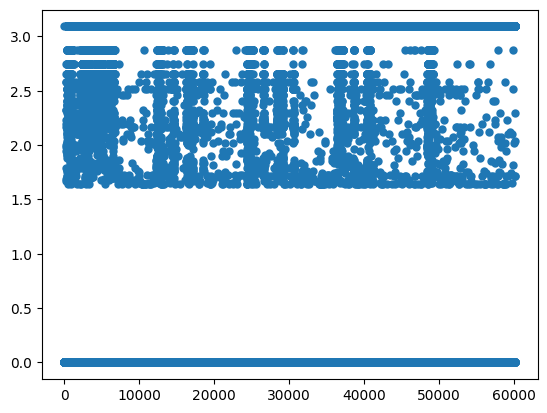

In [157]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(0,len(accounts_df),len(accounts_df)),accounts_df["GAW"],linewidths=0.01)

plt.show()

In [ ]:
accounts_df['']
29412

In [223]:
subgraph = nx.ego_graph(graph_orig, n=37363, radius=4) 

In [224]:
len(subgraph.nodes)

192

In [213]:
subgraph.edges(data=True)

OutMultiEdgeDataView([(2, 36139, {'base_amt': 521.49, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 24117, {'base_amt': 670.8, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 12066, {'base_amt': 344.97, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 74, {'base_amt': 560.08, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 57, {'base_amt': 112.17, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 54, {'base_amt': 190.75, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 24103, {'base_amt': 713.79, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 36233, {'base_amt': 479.37, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 24097, {'base_amt': 106.99, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 24095, {'base_amt': 969.19, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 48184, {'base_amt': 391.42, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 48251, {'base_amt': 728.5, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 36183, {'base_amt': 935.31, 'is_sar': False, 'tx_type': 'TRANSFER'}), (2, 36142, {'base_amt': 274

In [225]:
edges_df = pd.DataFrame([(u, v, d['is_sar']) for u, v, d in subgraph.edges(data=True)], columns=['source', 'target', 'is_sar'])

In [226]:
edges_df

source  target  is_sar
0      48640   12061   False
1      48640   12061   False
2      48640   12061   False
3      48640   12061   False
4      48640   12061   False
...      ...     ...     ...
3882   12265   12053   False
3883   12265      15   False
3884   12265   48197   False
3885   12265   24106   False
3886   37363   38074    True

[3887 rows x 3 columns]

In [227]:
new_transactions_dir = filepath[:-4]+"_subgraph.csv"
edges_df.to_csv(new_transactions_dir)

In [228]:
import community as community_louvain

In [239]:
G_undirected = graph_orig.to_undirected()

partition = community_louvain.best_partition(G_undirected)

In [272]:
idxs = [key for key, value in partition.items() if value == 1]
a = accounts_df['node_deg_total'][idxs]
a.to_numpy()

25249.0

In [276]:
network_size = len(accounts_df['node_deg_in'])
accounts_df['com_density_in_ratio'] = np.zeros(network_size)
accounts_df

GAW     GAW10     GAW20  Std_Degree  node_amt_total_in  \
0      0.000000  0.000000  0.000000    0.636779           69939.54   
1      0.000000  0.000000  0.000000    4.201143          169873.62   
2      0.000000  0.000000  0.000000    4.082331           66060.84   
3      0.000000  0.000000  0.000000    7.319961          427752.11   
4      0.000000  0.000000  0.000000    7.349664          644300.08   
...         ...       ...       ...         ...                ...   
60210  3.090529  3.090529  3.090529   -0.165202               0.00   
60211  3.090529  3.090529  3.090529   -0.165202               0.00   
60212  3.090529  3.090529  3.090529   -0.165202               0.00   
60213  3.090529  3.090529  3.090529   -0.165202               0.00   
60214  3.090529  3.090529  3.090529   -0.165202               0.00   

       node_amt_min_in  node_amt_max_in  node_amt_mean_in  node_amt_median_in  \
0               100.92           997.15        564.028548             521.155   
1               105.76           995.33        537.574747             553.775   
2               101.15           990.12        550.507000             565.905   
3                30.37           999.15        544.907146             545.910   
4                52.82           998.67        546.480136             551.640   
...                ...              ...               ...                 ...   
60210             0.00             0.00          0.000000               0.000   
60211             0.00             0.00          0.000000               0.000   
60212             0.00             0.00          0.000000               0.000   
60213             0.00             0.00          0.000000               0.000   
60214             0.00             0.00          0.000000               0.000   

       node_amt_std_in  ...  node_amt_min_out  node_amt_max_out  \
0           268.234976  ...            113.58            997.17   
1           262.974305  ...            100.16            995.10   
2           248.839058  ...            105.28            992.15   
3           264.934602  ...            135.85            997.76   
4           262.954140  ...            101.19            997.35   
...                ...  ...               ...               ...   
60210         0.000000  ...              0.00              0.00   
60211         0.000000  ...              0.00              0.00   
60212         0.000000  ...              0.00              0.00   
60213         0.000000  ...              0.00              0.00   
60214         0.000000  ...              0.00              0.00   

       node_amt_mean_out  node_amt_median_out  node_amt_std_out  node_deg_out  \
0             581.156893               568.46        238.404669         103.0   
1             573.017379               587.56        275.524184         103.0   
2             537.642451               494.55        284.680253         102.0   
3             601.035243               633.60        270.419679         103.0   
4             570.815922               600.10        256.079211         103.0   
...                  ...                  ...               ...           ...   
60210           0.000000                 0.00          0.000000           0.0   
60211           0.000000                 0.00          0.000000           0.0   
60212           0.000000                 0.00          0.000000           0.0   
60213           0.000000                 0.00          0.000000           0.0   
60214           0.000000                 0.00          0.000000           0.0   

       node_deg_out_unique  node_deg_total  node_isSar  com_density_in_ratio  
0                     18.0           227.0         0.0                   0.0  
1                    103.0           419.0         0.0                   0.0  
2                    102.0           222.0         0.0                   0.0  
3                    103.0           888.0         0.0                   0.0  
4                    103.